In [2]:
#Set up workspace
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import imageio
import pylab as pl
%matplotlib inline
from scipy.interpolate import interp1d

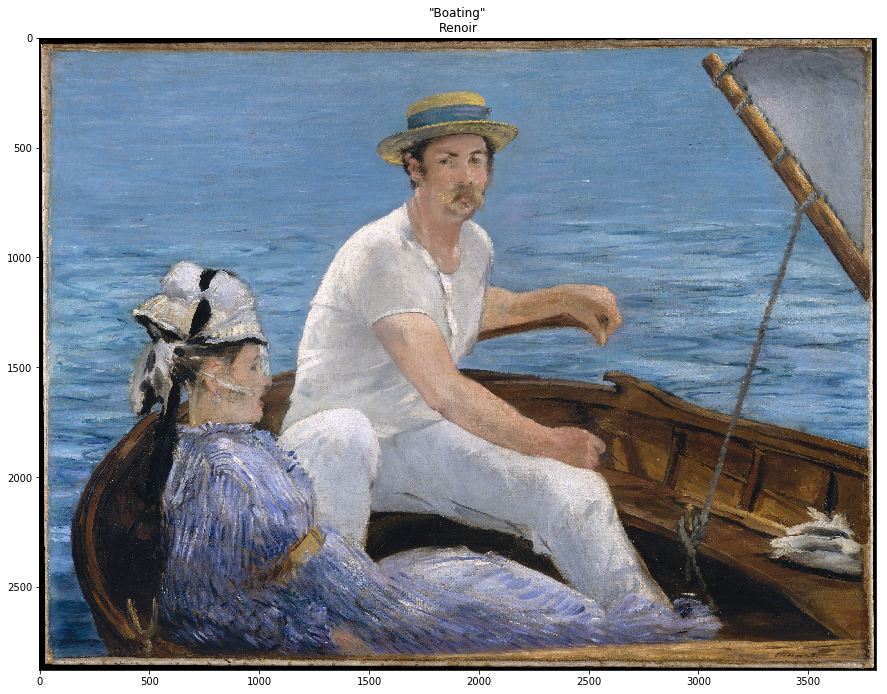

In [3]:
pic = imageio.imread('Paintings/Boating.jpg')
plt.figure(figsize = (15,15))
plt.title('"Boating"\nRenoir')
plt.imshow(pic)

In [4]:
print('Type of the image : ' , type(pic))
print('Shape of the image : {}'.format(pic.shape))
print('Image Height {}'.format(pic.shape[0]))
print('Image Width {}'.format(pic.shape[1]))
print('Dimension of Image {}'.format(pic.ndim))

('Type of the image : ', <class 'imageio.core.util.Array'>)
Shape of the image : (2878, 3811, 3)
Image Height 2878
Image Width 3811
Dimension of Image 3


In [5]:
print('Image size {}'.format(pic.size))
print('Maximum RGB value in this image {}'.format(pic.max()))
print('Minimum RGB value in this image {}'.format(pic.min()))

Image size 32904174
Maximum RGB value in this image 255
Minimum RGB value in this image 0


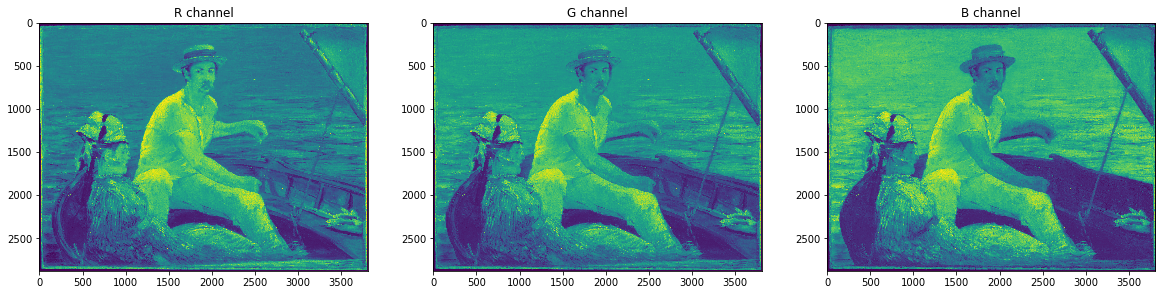

In [6]:
plt.figure(figsize = (20,15))

plt.subplot(1, 3, 1)
plt.title('R channel')
plt.imshow(pic[ : , : , 0])

plt.subplot(1, 3, 2)
plt.title('G channel')
plt.imshow(pic[ : , : , 1])

plt.subplot(1, 3, 3)
plt.title('B channel')
plt.imshow(pic[ : , : , 2])
plt.show()

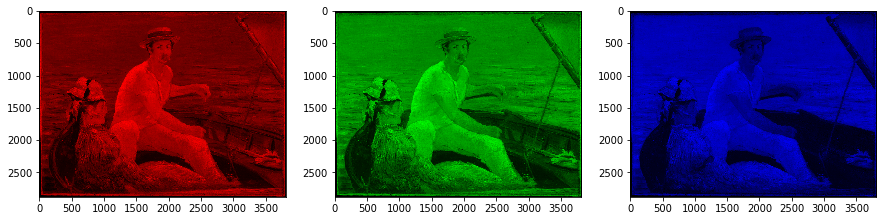

In [7]:
fig, ax = plt.subplots(nrows = 1, ncols=3, figsize=(15,5))
for c, ax in zip(range(3), ax):
    
    # create zero matrix
    split_img = np.zeros(pic.shape, dtype="uint8") # 'dtype' by default: 'numpy.float64'
    
    #Assign each color channel
    split_img[ :, :, c] = pic[ :, :, c]
    
    # display each channel
    ax.imshow(split_img)

Why do these look so different from the above?

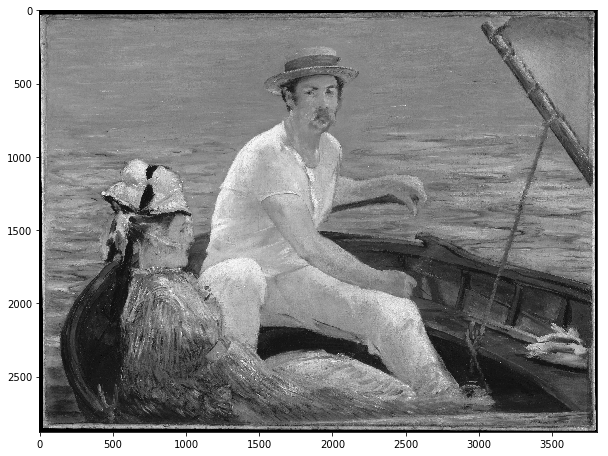

In [42]:
#OK, let's get the image in grayscale using a "Weighted average" formula referenced here
#https://en.wikipedia.org/wiki/Grayscale#Converting_color_to_grayscale

gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 
gray_ren = gray(pic)  
plt.figure( figsize = (10,10))
plt.imshow(gray_ren, cmap = plt.get_cmap(name = 'gray'))
plt.show()

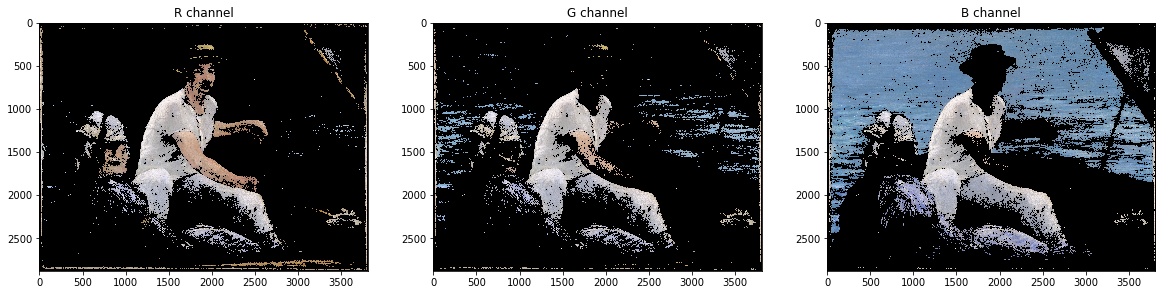

In [9]:
plt.figure(figsize = (20,15))

# Only Red Pixel value , higher than 180
red_pic = pic.copy()
red_mask = red_pic[:, :, 0] < 160
red_pic[red_mask] = 0

green_pic = pic.copy()
green_mask = green_pic[:, :, 1] < 160
green_pic[green_mask] = 0

blue_pic = pic.copy()
blue_mask = blue_pic[:, :, 2] < 160
blue_pic[blue_mask] = 0

#PLOT THE ABOVE
plt.subplot(1, 3, 1)
plt.imshow(red_pic)
plt.title('R channel')

plt.subplot(1, 3, 2)
plt.imshow(green_pic)
plt.title('G channel')

plt.subplot(1, 3, 3)
plt.imshow(blue_pic)
plt.title('B channel')

plt.show()

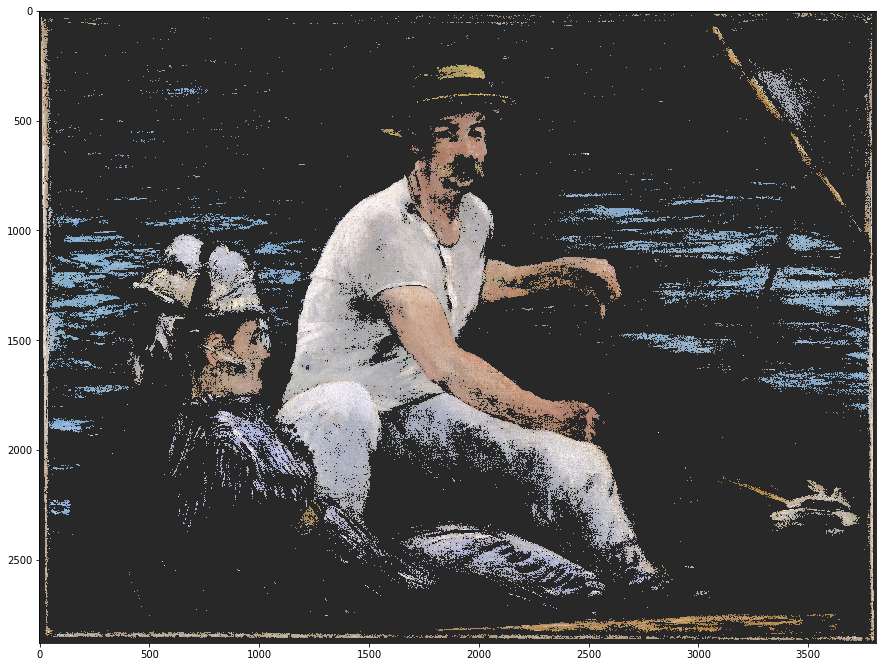

In [10]:
final_mask = np.logical_and(red_mask, green_mask, blue_mask)
final_pic = pic.copy()
final_pic[final_mask] = 40
plt.figure(figsize=(15,15))
plt.imshow(final_pic)

In [43]:
#Ok, let's convert the grayscale to a simple black-white: that may help us in observing the 
#"Fractal" structure (and other formal qualities)

def bw_convert(img,thresh):
    bw_pic = img.copy()
    bw_mask = bw_pic[:, :,] < thresh
    bw_pic[bw_mask] = 0
    bw_pic[~bw_mask] = 1
    
    return bw_pic

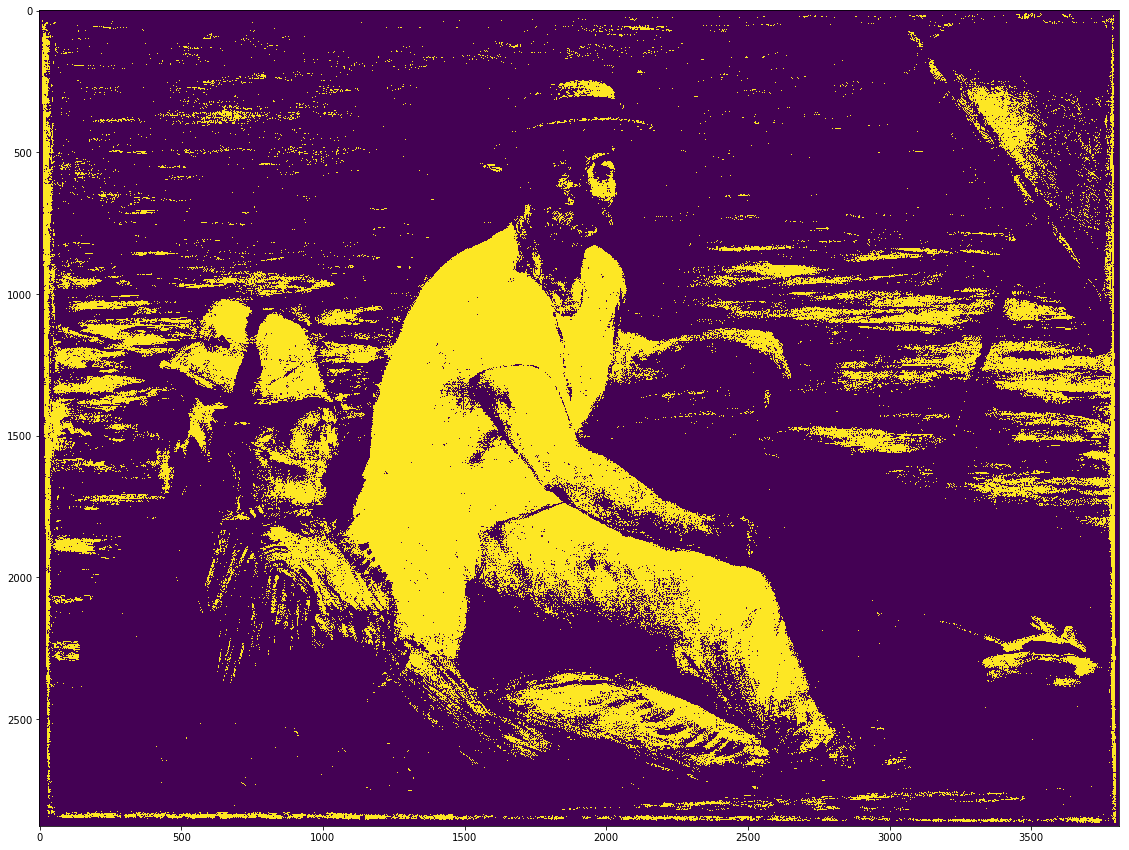

In [46]:
bw_pic = bw_convert(gray_ren,150)

plt.figure(figsize = (20,15))
plt.imshow(bw_pic)

Ok, let's see if we can compute the fractal dimension of the above. 

In [47]:
# finding all the non-zero pixels

pixels=[]
for i in range(bw_pic.shape[0]):
    for j in range(bw_pic.shape[1]):
        if bw_pic[i,j]>0:
            pixels.append((i,j))

In [48]:
Lx=bw_pic.shape[1]
Ly=bw_pic.shape[0]

pixels=pl.array(pixels)
 
# computing the fractal dimension
#considering only scales in a logarithmic list
scales=np.logspace(0.01, 1, num=10, endpoint=False, base=2)

Ns=[]
# looping over several scales
for scale in scales:
    print ("======= Scale :",scale)
    # computing the histogram
    H, edges=np.histogramdd(pixels, bins=(np.arange(0,Lx,scale),np.arange(0,Ly,scale)))
    Ns.append(np.sum(H>0))

('======= Scale :', 1.0069555500567189)
('======= Scale :', 1.0784804316944516)
('======= Scale :', 1.1550857845535842)
('======= Scale :', 1.2371324786871727)
('======= Scale :', 1.3250070170452075)
('======= Scale :', 1.4191233562003824)
('======= Scale :', 1.5199248564015158)
('======= Scale :', 1.6278863701408692)
('======= Scale :', 1.7435164790741244)
('======= Scale :', 1.8673598898306263)


Text(0,0.5,'log N')

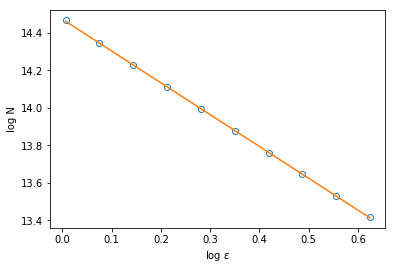

In [49]:
# linear fit, polynomial of degree 1
coeffs=np.polyfit(np.log(scales), np.log(Ns), 1)
 
pl.plot(np.log(scales),np.log(Ns), 'o', mfc='none')
pl.plot(np.log(scales), np.polyval(coeffs,np.log(scales)))
pl.xlabel('log $\epsilon$')
pl.ylabel('log N')

In [50]:
print ("The Hausdorff dimension is", -coeffs[0]) #the fractal dimension is the OPPOSITE of the fitting coefficient

('The Hausdorff dimension is', 1.699223973980543)


Note: 1980s formal analysis, triangular composition. 

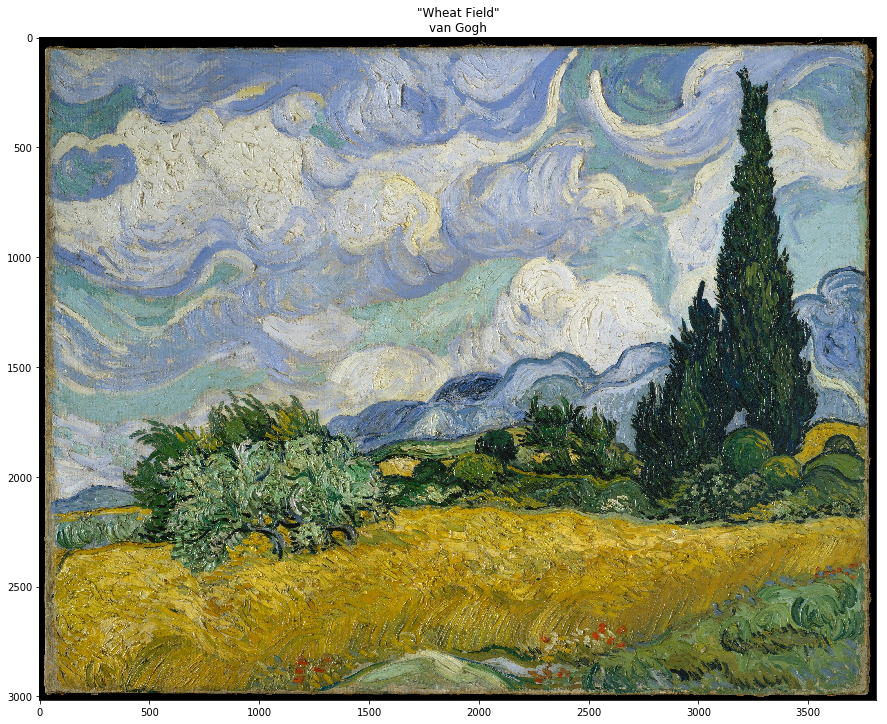

In [51]:
van = imageio.imread('Paintings/Wheat_Field.jpg')
plt.figure(figsize = (15,15))
plt.title('"Wheat Field"\nvan Gogh')
plt.imshow(van)

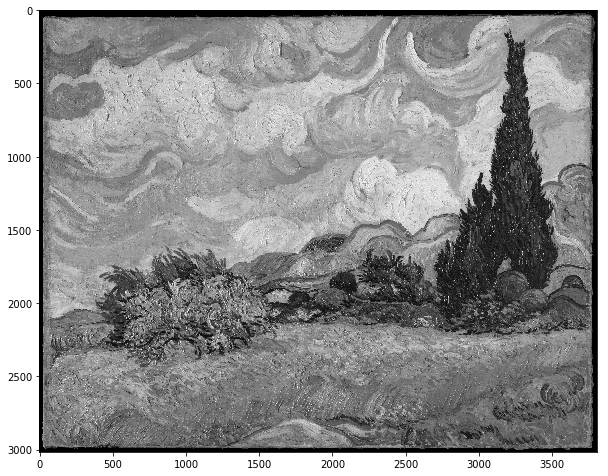

In [52]:
gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 
gray_van = gray(van)  
plt.figure( figsize = (10,10))
plt.imshow(gray_van, cmap = plt.get_cmap(name = 'gray'))
plt.show()

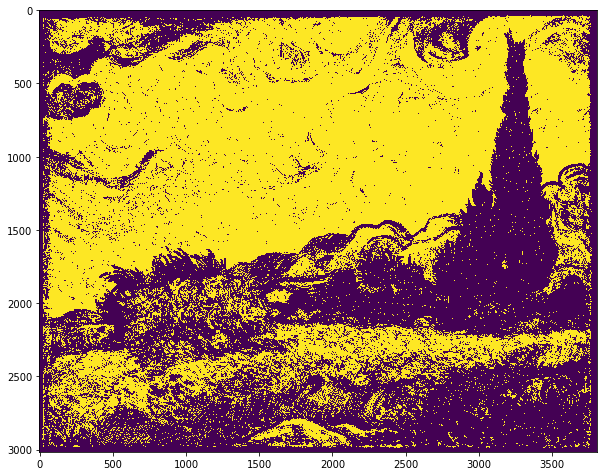

In [84]:
bw_van = bw_convert(gray_van,130)

plt.figure(figsize = (10,10))
plt.imshow(bw_van)

In [83]:
#Ok, let's write a formula that can convert from color to bw/binary image
def make_bw(img,thresh=130):
    gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 
    gray_img = gray(img)
    bw_img = bw_convert(gray_img,thresh)
    
    return bw_img

Could we write something that is able to extract/identify forms or patterns?

In [54]:
#Edge Detection
import skimage
import skimage.feature
import skimage.viewer
import sys
from skimage.data import camera
from skimage.filters import roberts, sobel, sobel_h, sobel_v, scharr, scharr_h, scharr_v, prewitt, prewitt_v, prewitt_h

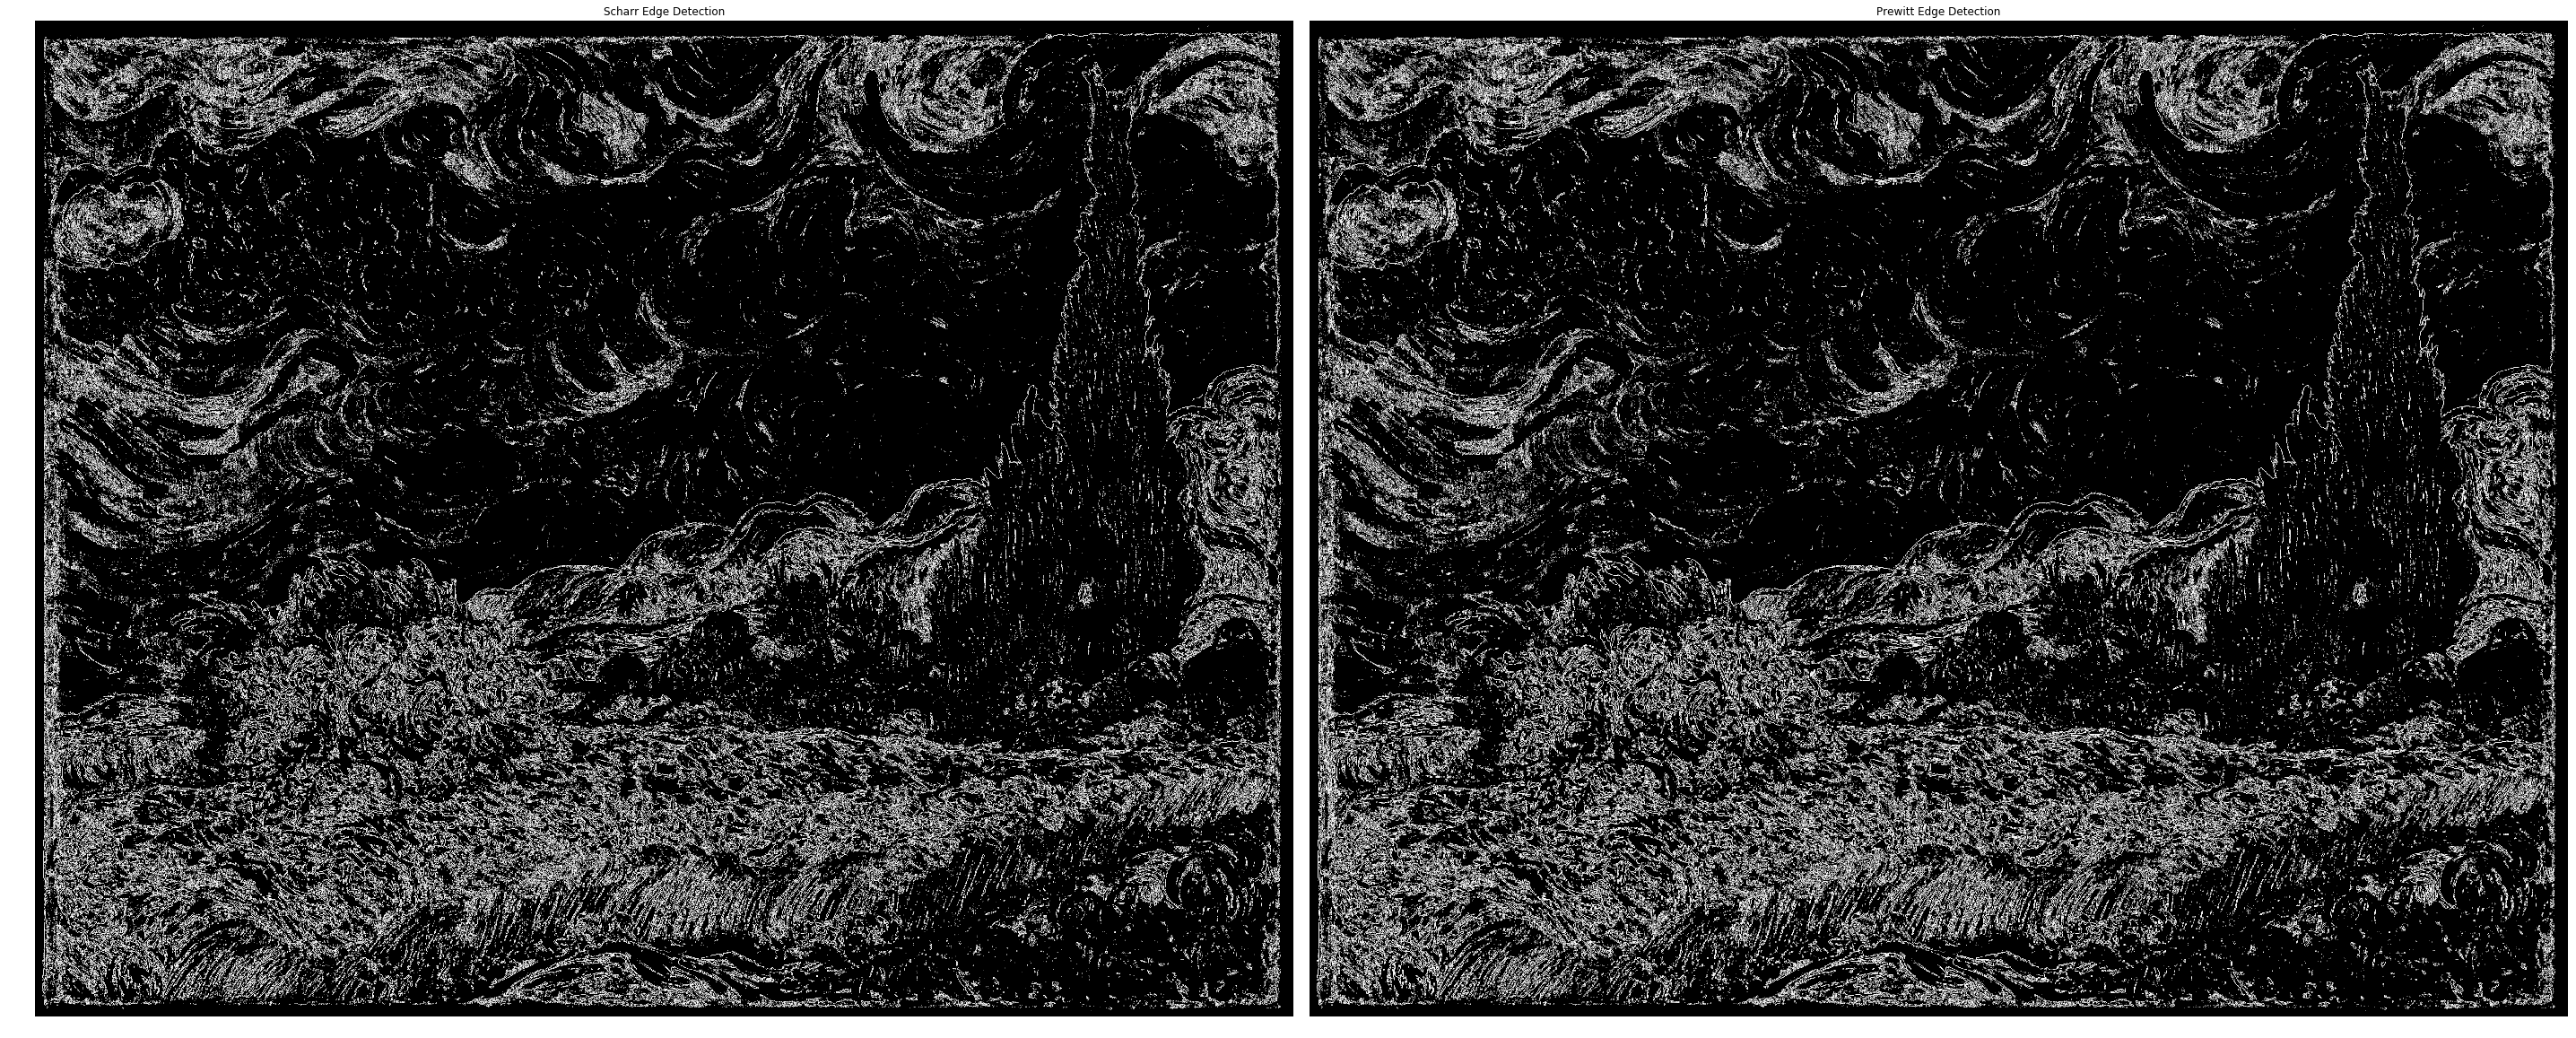

In [55]:
edge_scharr = scharr(bw_van)
edge_prewitt = prewitt(bw_van)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(40,20))

ax[0].imshow(edge_scharr, cmap=plt.cm.gray)
ax[0].set_title('Scharr Edge Detection')

ax[1].imshow(edge_prewitt, cmap=plt.cm.gray)
ax[1].set_title('Prewitt Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()


In [57]:
from skimage import data, segmentation, filters, color
from skimage.future import graph
from matplotlib import pyplot as plt

def weight_boundary(graph, src, dst, n):
    default = {'weight': 0.0, 'count': 0}

    count_src = graph[src].get(n, default)['count']
    count_dst = graph[dst].get(n, default)['count']

    weight_src = graph[src].get(n, default)['weight']
    weight_dst = graph[dst].get(n, default)['weight']

    count = count_src + count_dst
    return {
        'count': count,
        'weight': (count_src * weight_src + count_dst * weight_dst)/count
    }


def merge_boundary(graph, src, dst):
    """Call back called before merging 2 nodes.

    In this case we don't need to do any computation here.
    """
    pass

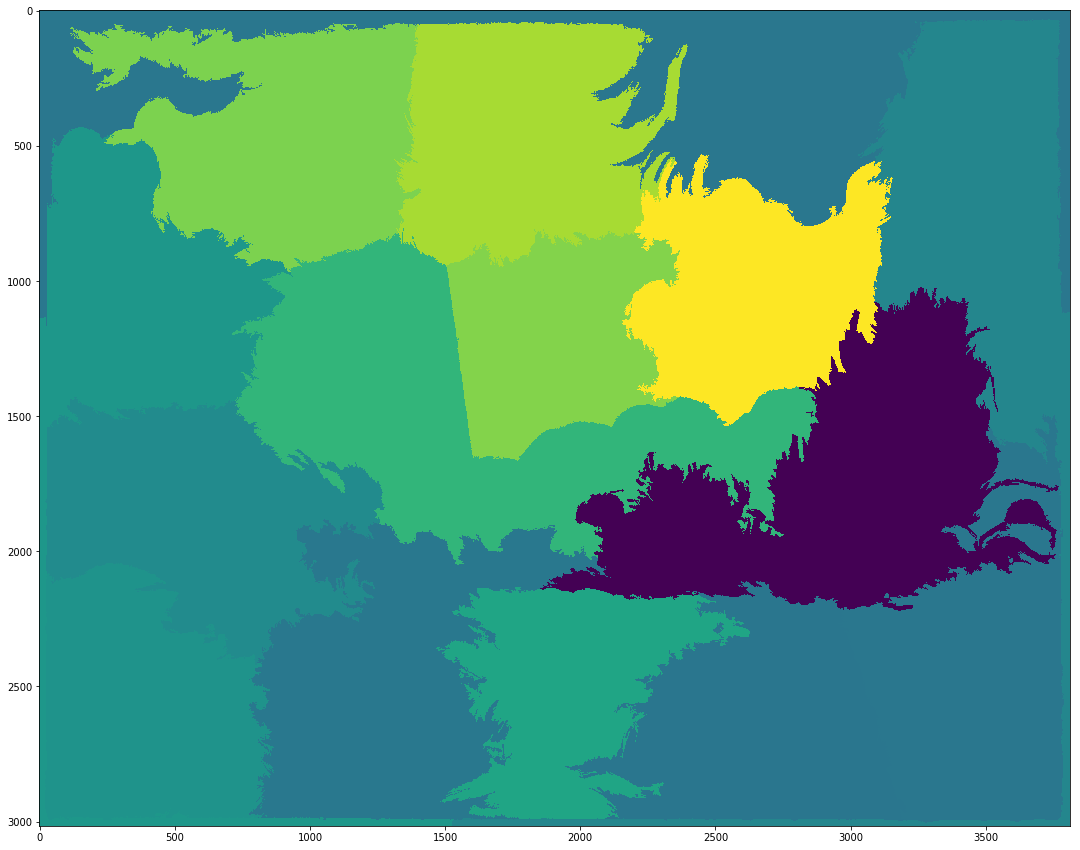

In [61]:
img = gray_van.copy()
edges = filters.sobel(img)
labels = segmentation.slic(img, compactness=60, n_segments=20)
g = graph.rag_boundary(labels, edges)
labels2 = graph.merge_hierarchical(labels, g, thresh=0.08, rag_copy=False,
                                   in_place_merge=True,
                                   merge_func=merge_boundary,
                                   weight_func=weight_boundary)

plt.figure(figsize = (20,15))
out = color.label2rgb(labels2, img, kind='avg')
plt.imshow(out)
plt.show()

Ok, so the above segmented the image into color blocks. And it looks nice and intuitive. Now let's write our own edge detector that returns a "1" wherever there is a change in value. 

In [62]:
# finding all the non-zero pixels

pixels=[]
for i in range(out.shape[0]):
    for j in range(out.shape[1]):
        if i==0:
            pixels.append(0)
        elif j==0:
            pixels.append(0)
        elif i==out.shape[0]-1: ##
            pixels.append(0)
        elif j==out.shape[1]-1: ##
            pixels.append(0)
        
        elif out[i,j]!=out[i-1,j]:
            pixels.append(1)
        elif out[i,j]!=out[i,j+1]:
            pixels.append(1)
            
        elif out[i,j]!=out[i+1,j]:
            pixels.append(1)
        elif out[i,j]!=out[i,j+1]:
            pixels.append(1)
        else:
            pixels.append(0)

pixels_matrix = np.array(pixels).reshape(out.shape)

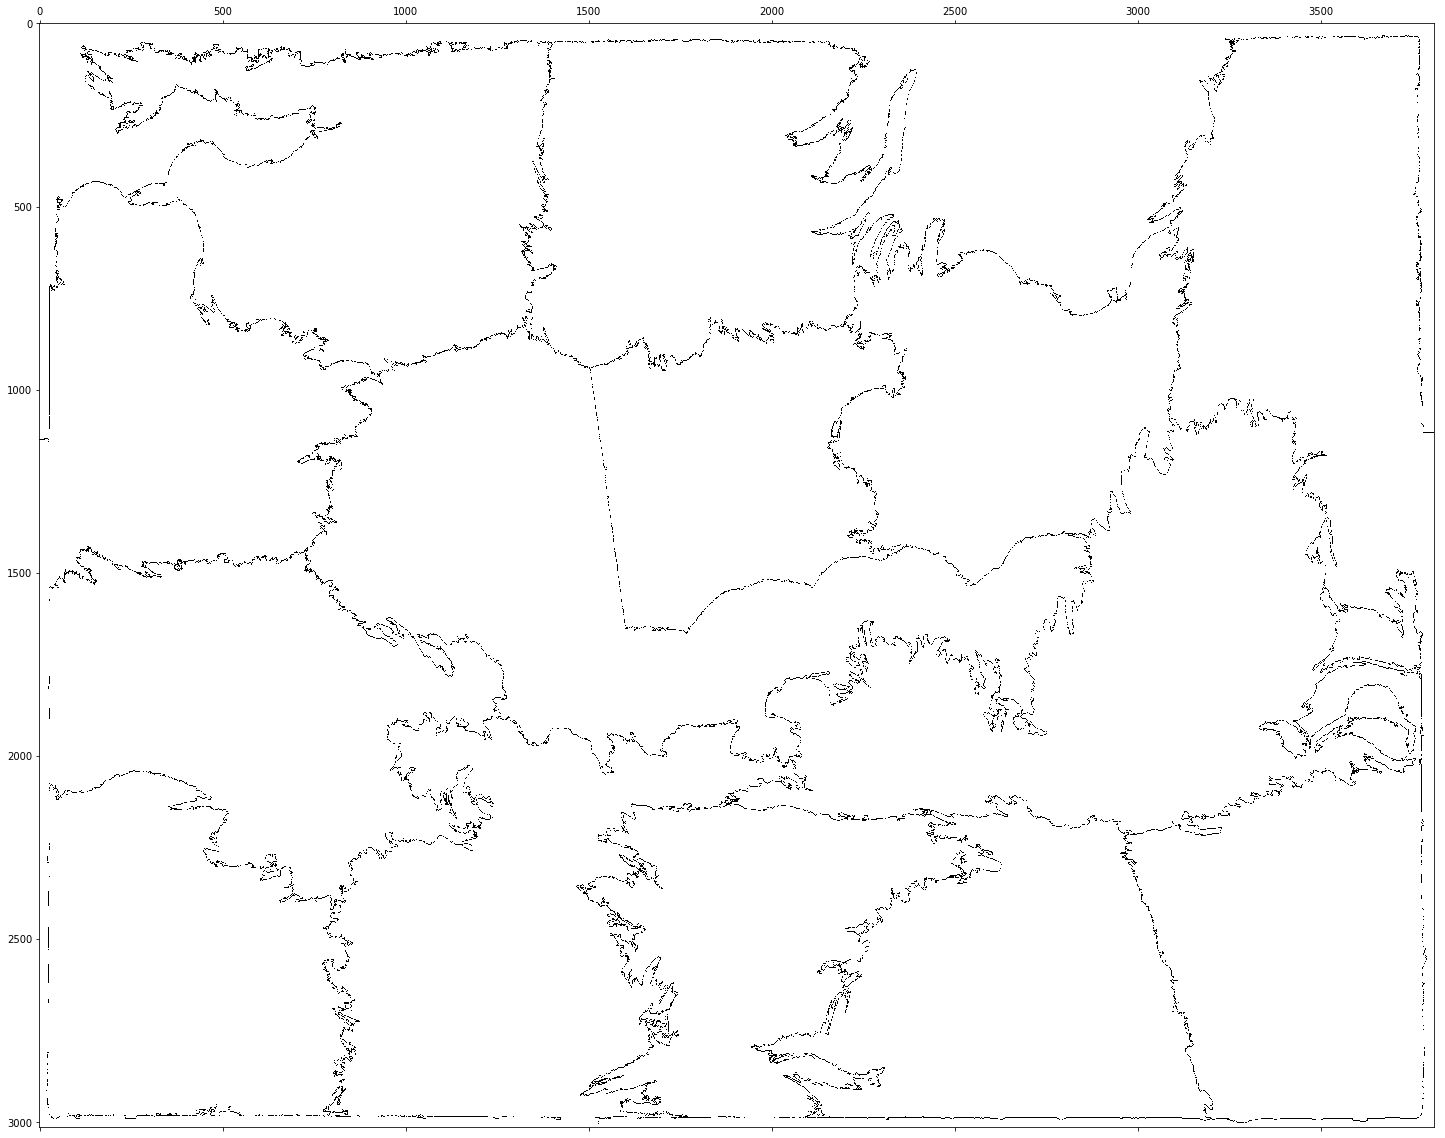

In [99]:
plt.figure(figsize = (25,25))
plt.spy(pixels_matrix)

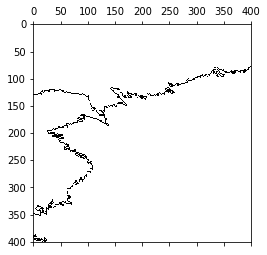

In [65]:
plt.spy(pixels_matrix[800:1200, 800:1200])

Ok, so the above gets the edges. But they are so faint, and also quite rough....is there a way to make them smoother, and also to make them thicker (just for the sake of visibility)?

Actually, interpolation itself would make this smoother. 

Ok, let's write a formula that does all of the above. 

In [80]:
def get_edges(image):
    gray_img = gray(image)  
    
    edges = filters.sobel(gray_img)
    labels = segmentation.slic(gray_img, compactness=30, n_segments=10)
    g = graph.rag_boundary(labels, edges)
    labels2 = graph.merge_hierarchical(labels, g, thresh=0.08, rag_copy=False,
                                       in_place_merge=True,
                                       merge_func=merge_boundary,
                                       weight_func=weight_boundary)

    out = color.label2rgb(labels2, gray_img, kind='avg')
    
    # finding all the non-zero pixels
    pixels=[]
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            if i==0:
                pixels.append(0)
            elif j==0:
                pixels.append(0)
            elif i==out.shape[0]-1: ##
                pixels.append(0)
            elif j==out.shape[1]-1: ##
                pixels.append(0)

            elif out[i,j]!=out[i-1,j]:
                pixels.append(1)
            elif out[i,j]!=out[i,j+1]:
                pixels.append(1)

            elif out[i,j]!=out[i+1,j]:
                pixels.append(1)
            elif out[i,j]!=out[i,j+1]:
                pixels.append(1)
            else:
                pixels.append(0)

    pixels_matrix = np.array(pixels).reshape(out.shape)
    
    return pixels_matrix

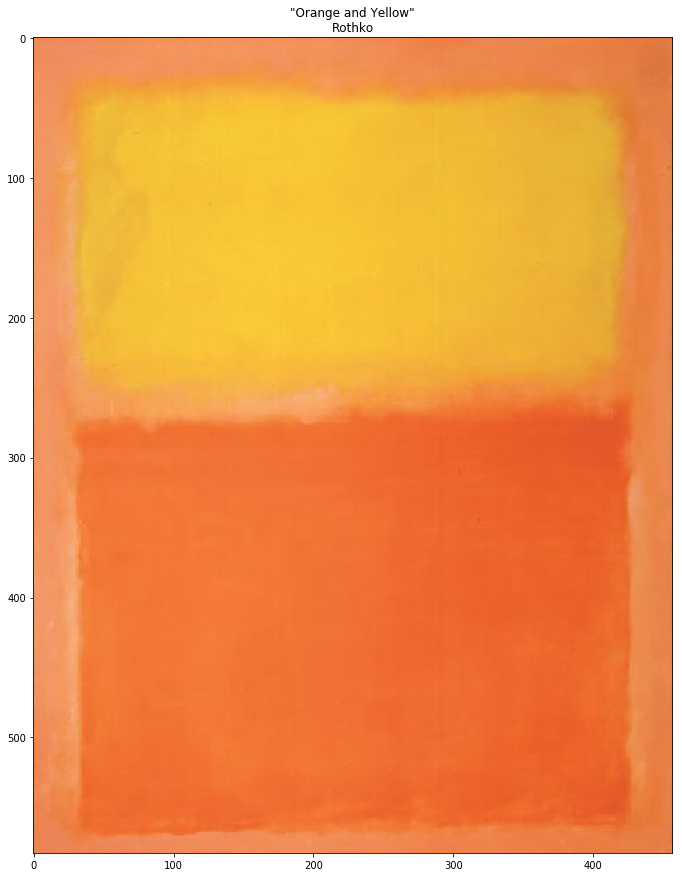

In [73]:
Rothko = imageio.imread('Paintings/Rothko.jpeg')
plt.figure(figsize = (15,15))
plt.title('"Orange and Yellow"\nRothko')
plt.imshow(Rothko)

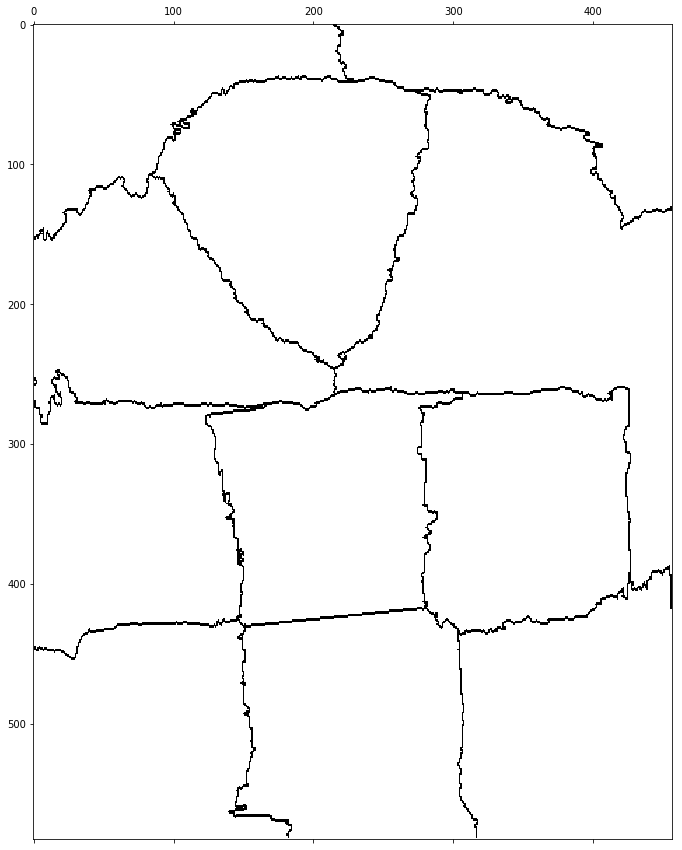

In [97]:
rothko_edges = get_edges(Rothko)
plt.figure(figsize = (15,15))
plt.spy(rothko_edges)

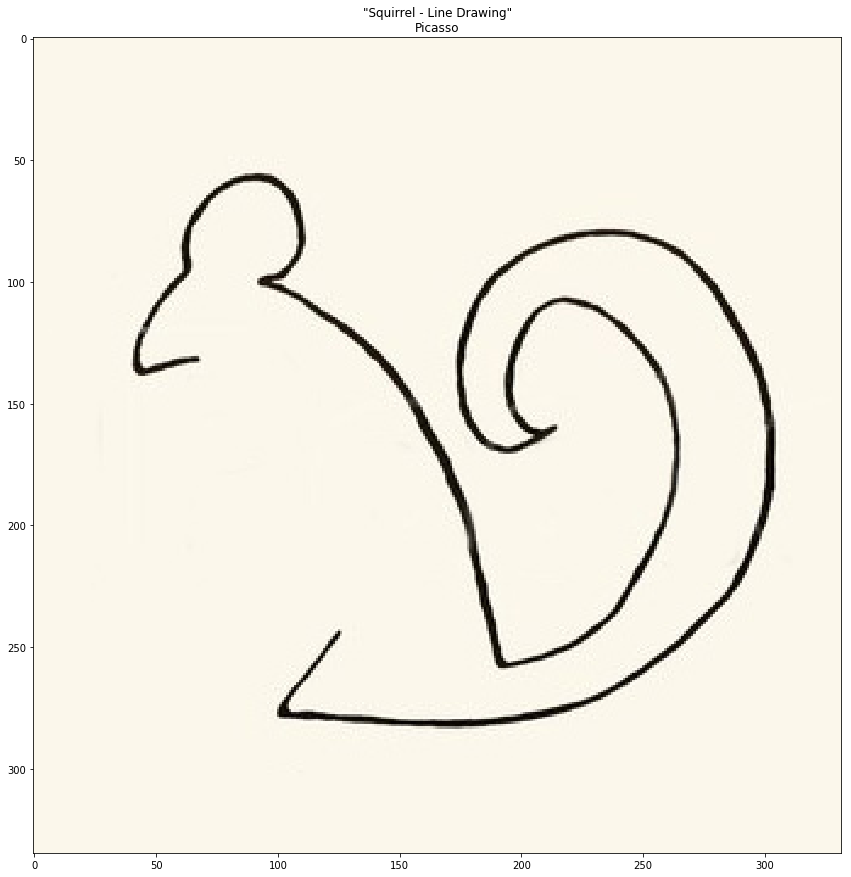

In [76]:
squirrel = imageio.imread('Paintings/Squirrel_Picasso.jpg')
plt.figure(figsize = (15,15))
plt.title('"Squirrel - Line Drawing"\nPicasso')
plt.imshow(squirrel)

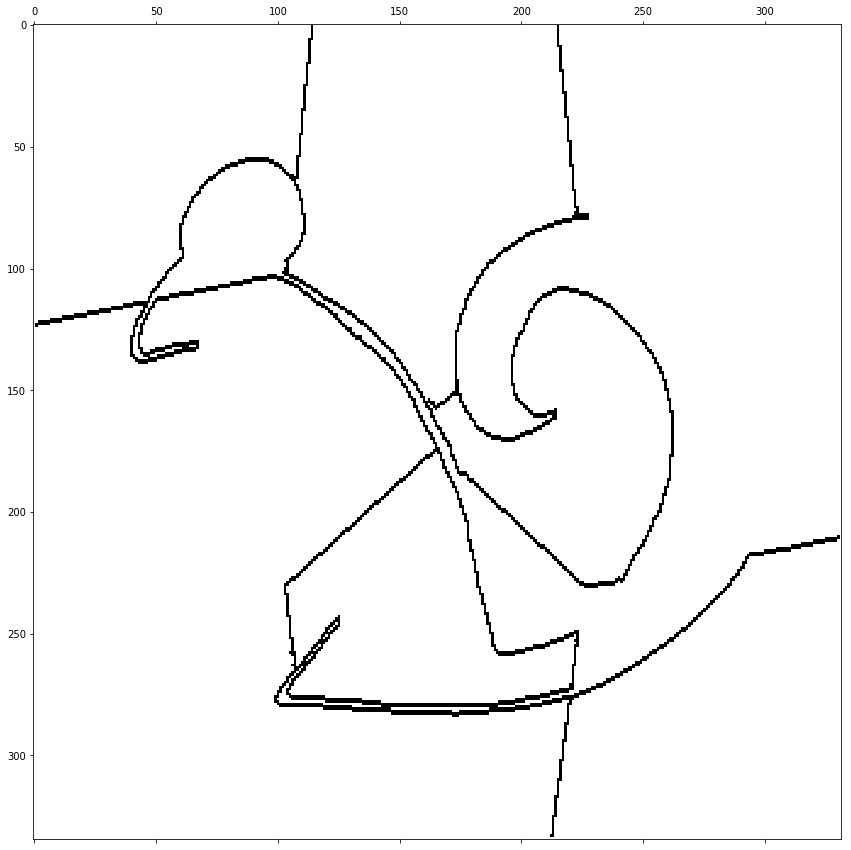

In [91]:
squirrel_edges = get_edges(squirrel)
plt.figure(figsize = (15,15))
plt.spy(squirrel_edges)

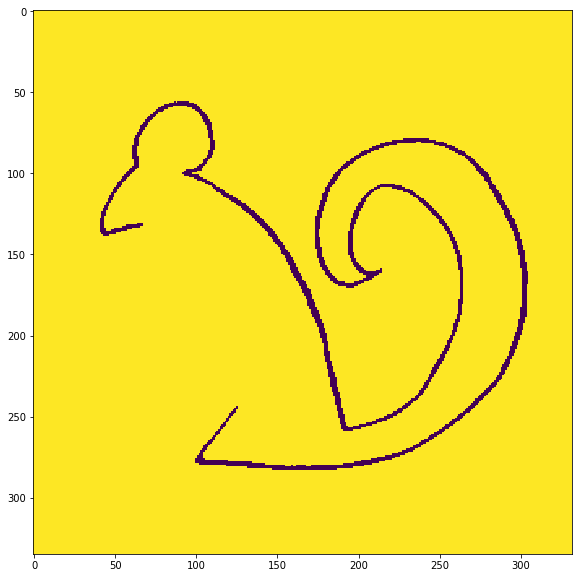

In [85]:
bw_sq = make_bw(squirrel,130)
plt.figure(figsize = (10,10))
plt.imshow(bw_sq)

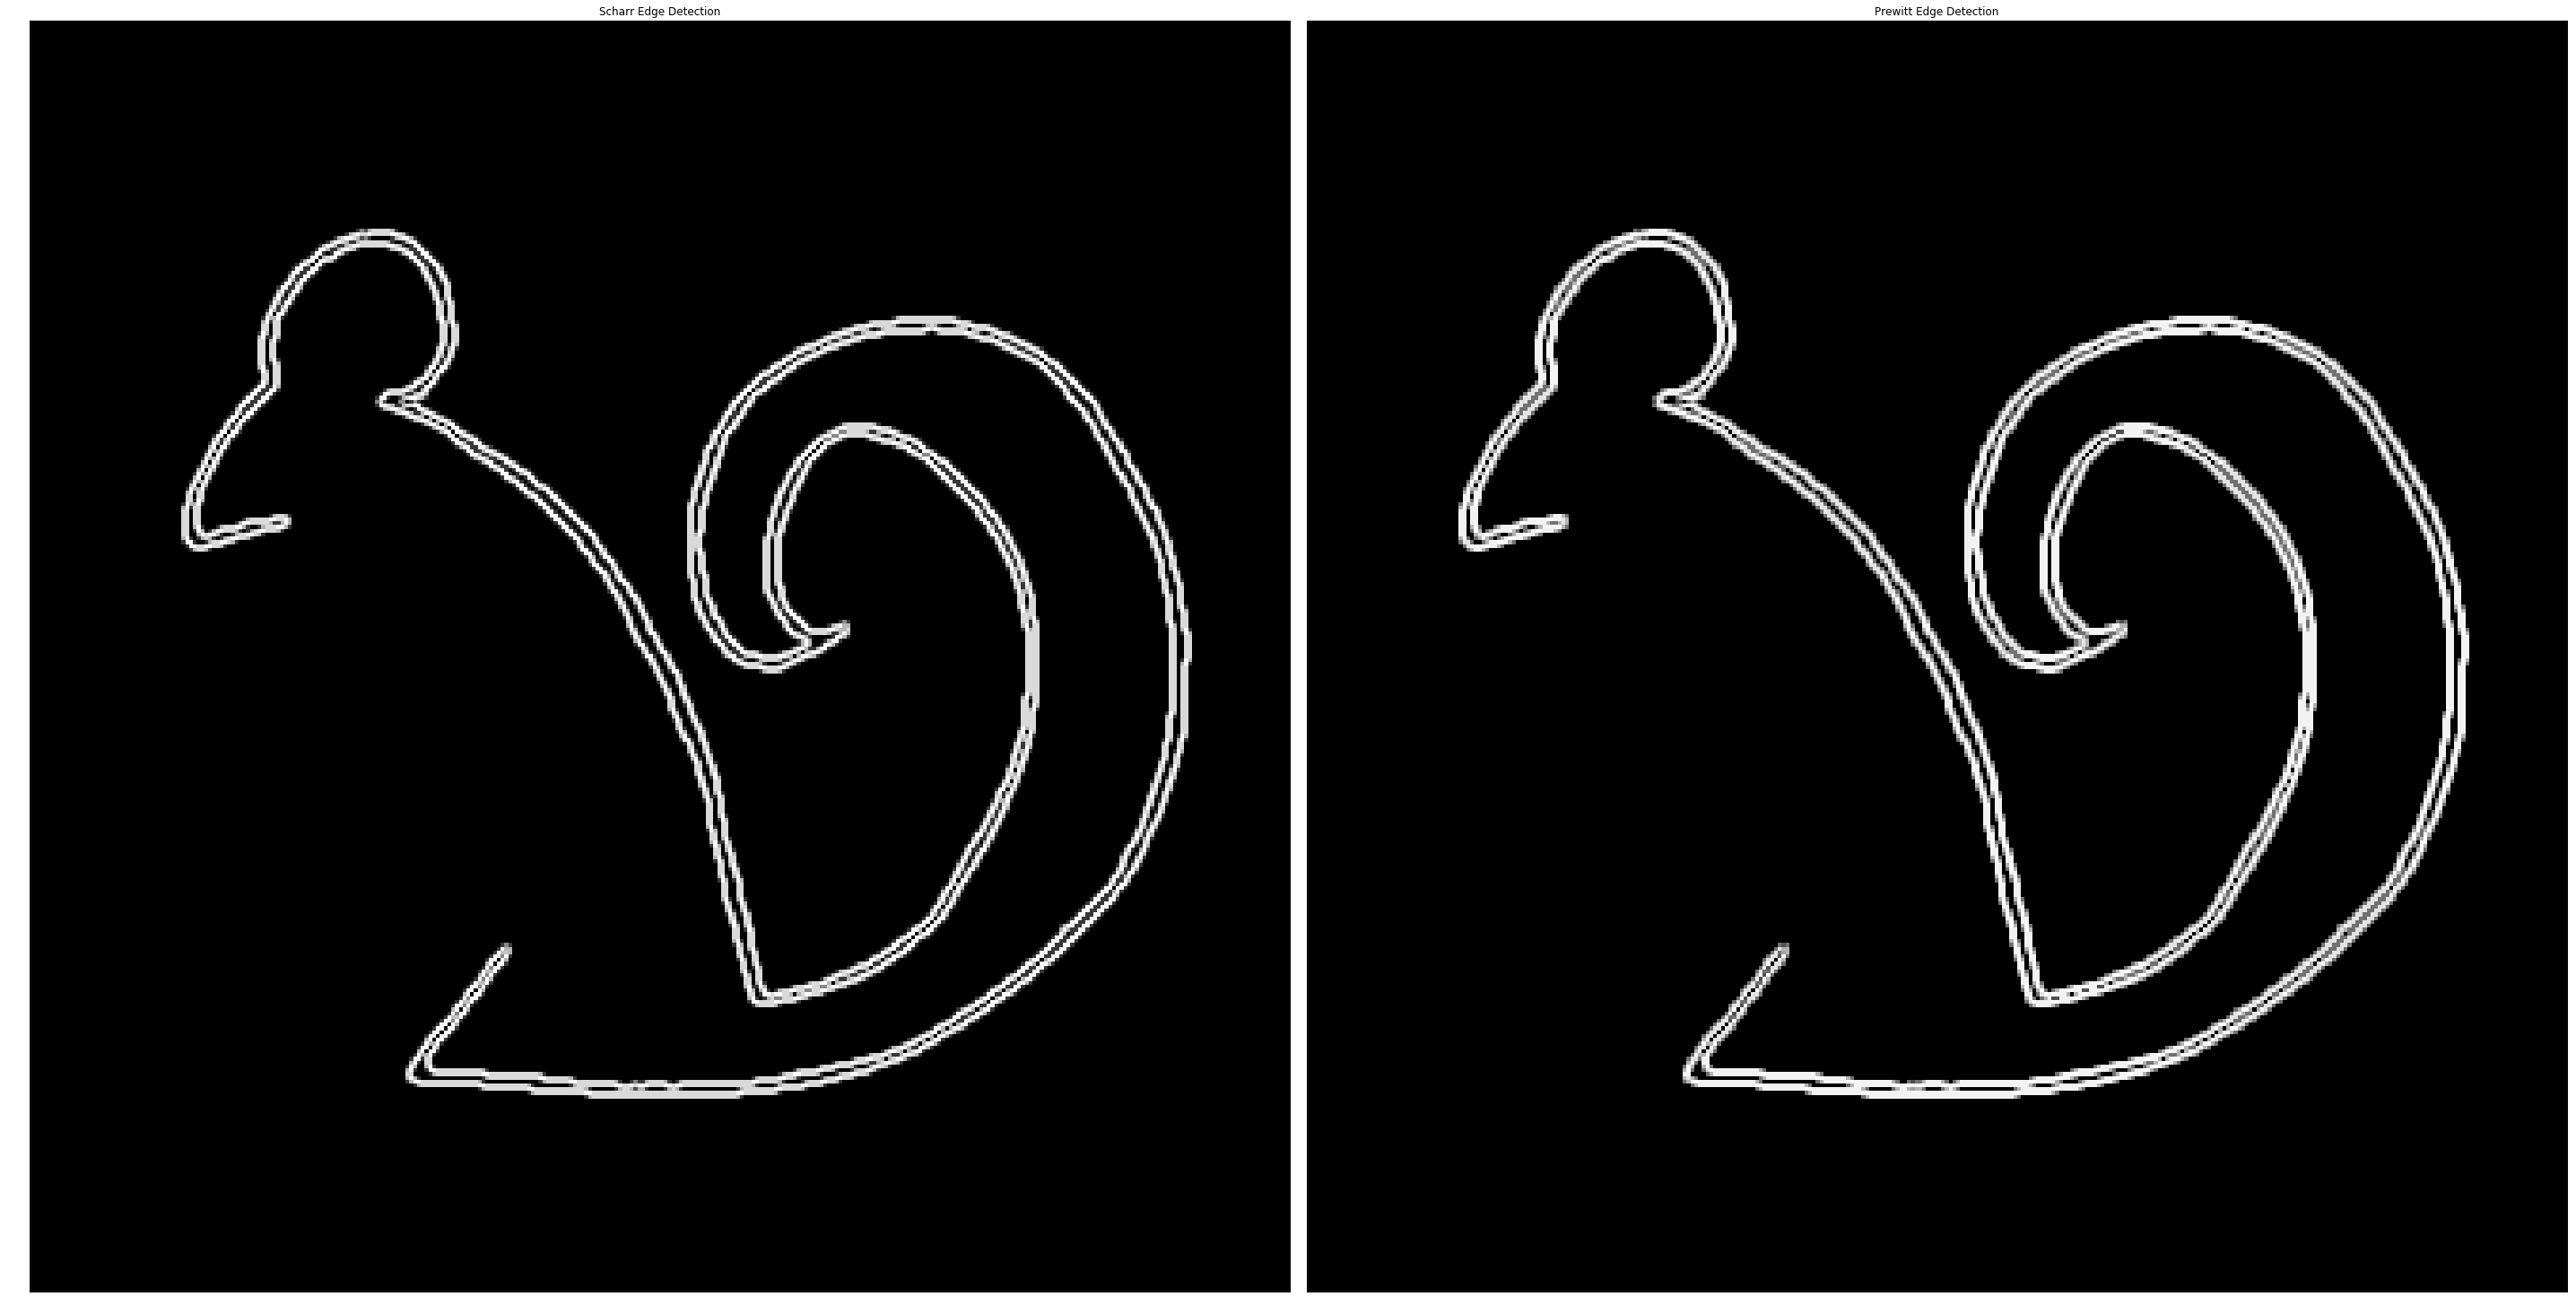

In [161]:
edge_sq = scharr(bw_sq)
edge_sq_2 = prewitt(bw_sq)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(40,20))

ax[0].imshow(edge_sq, cmap=plt.cm.gray)
ax[0].set_title('Scharr Edge Detection')

ax[1].imshow(edge_sq_2, cmap=plt.cm.gray)
ax[1].set_title('Prewitt Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

Ok, great! Edge detection using existing Python packages actually works pretty great for Picasso's line drawings. But you need to follow the following steps: 1. convert to BW; 2. convert to binary. 

In [87]:
edge_scharr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

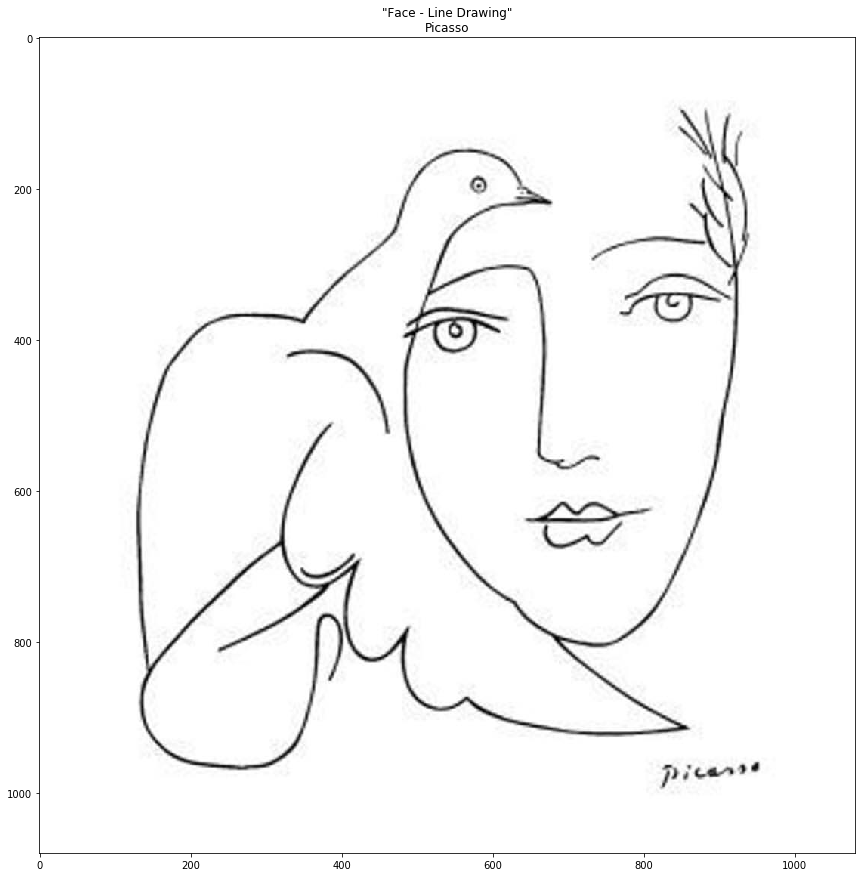

In [88]:
face = imageio.imread('Paintings/Face_Picasso.jpg')
plt.figure(figsize = (15,15))
plt.title('"Face - Line Drawing"\nPicasso')
plt.imshow(face)

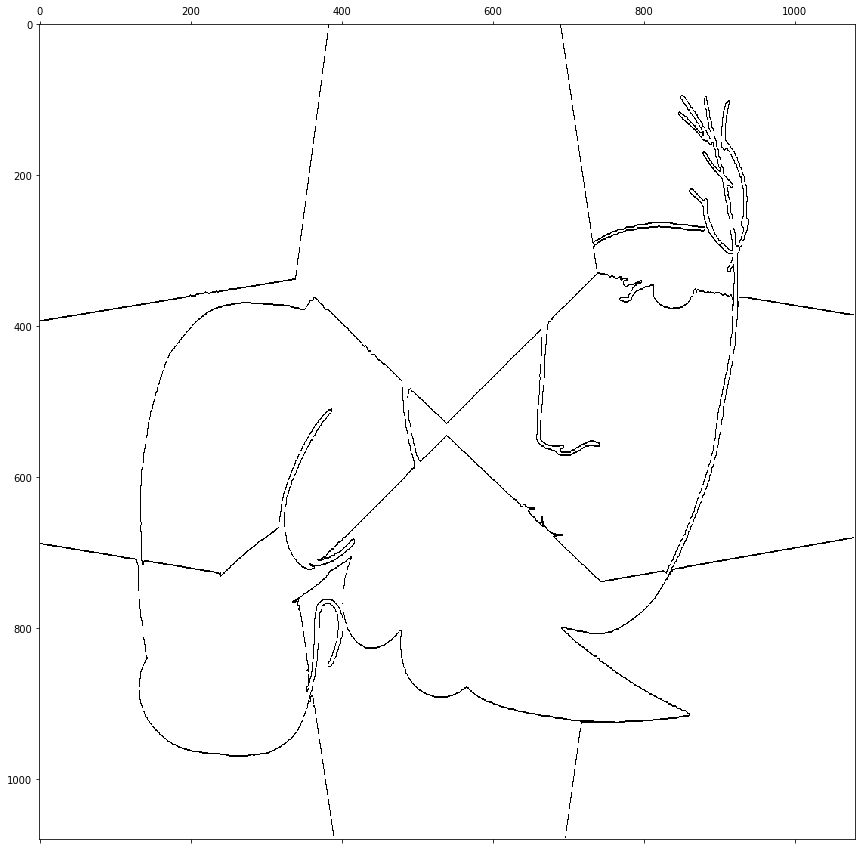

In [90]:
face_edges = get_edges(face)
plt.figure(figsize = (15,15))
plt.spy(face_edges)

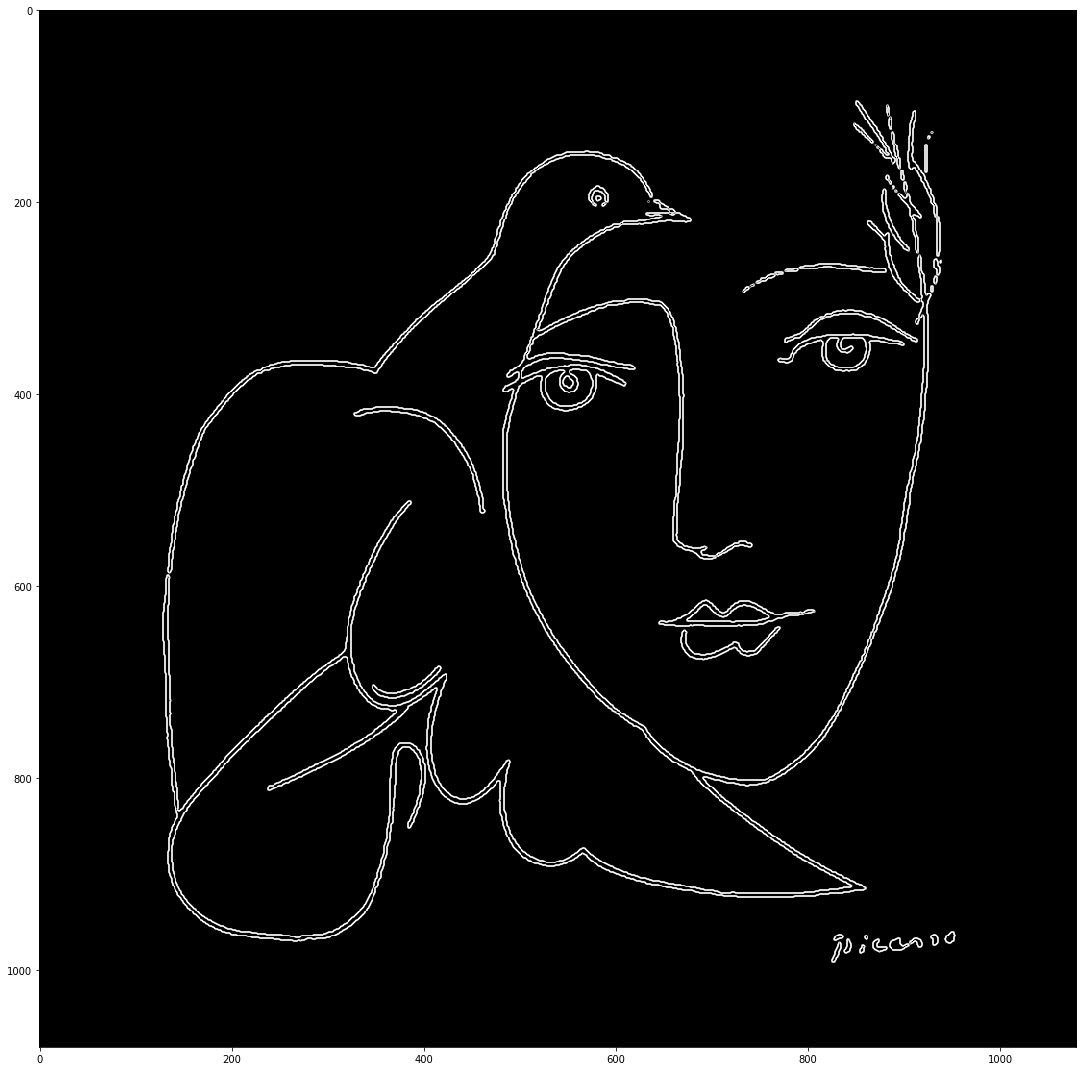

In [100]:
bw_face = make_bw(face,130)
face_edge = scharr(bw_face)
plt.figure(figsize = (15,15))
plt.imshow(face_edge, cmap=plt.cm.gray)
plt.tight_layout()
plt.show()

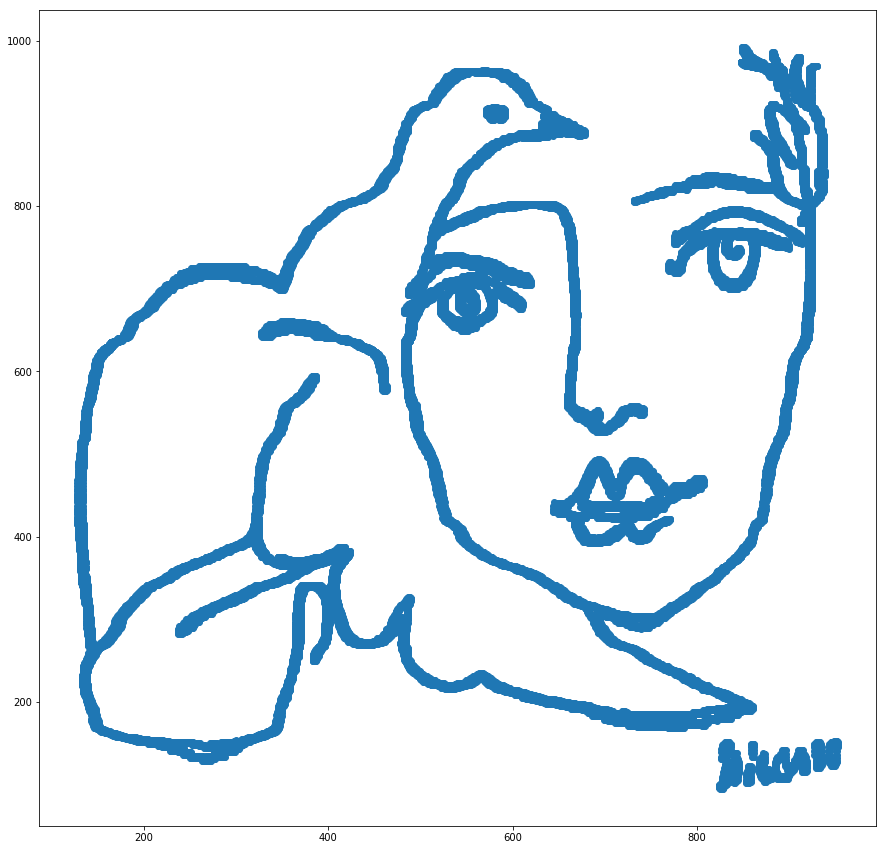

In [233]:
row_vals = []
col_vals = []
for i in range(len(face_edge)):
    for j in range(len(face_edge[i])):
        if face_edge[i][j]>0:
            row_vals.append(i)
            col_vals.append(j)

            
plt.figure(figsize = (15,15))
plt.scatter(list(reversed(col_vals)),row_vals)
plt.show()

In [271]:
def line_vectors(edge_image):
    row_vals = []
    col_vals = []
    for i in range(len(edge_image)):
        for j in range(len(edge_image[i])):
            if edge_image[i][j]>0:
                row_vals.append(i)
                col_vals.append(j)
    
    return list(reversed(col_vals)),row_vals
    

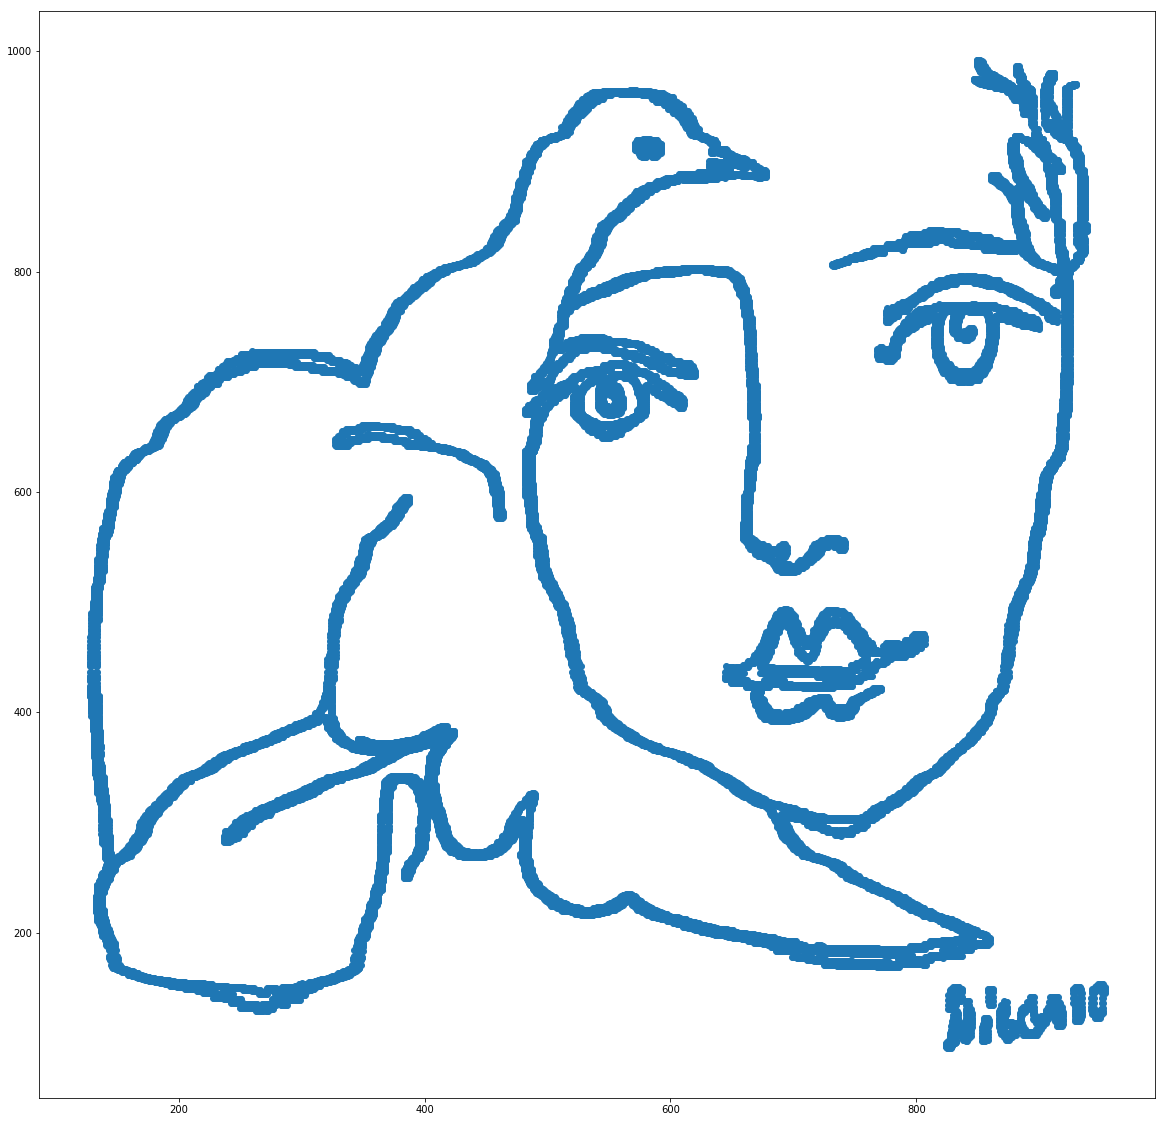

In [273]:
x_vals, y_vals = line_vectors(face_edge)
plt.figure(figsize = (20,20))
plt.scatter(x_vals,y_vals)
plt.show()

In [274]:
index_vals = []
index_val = 0
for i in x_vals:
    index_vals.append(index_val)
    index_val += 1
    

In [279]:
val_df = pd.DataFrame({
    'index':index_vals,
    'x_vals':x_vals,
    'y_vals':y_vals})

In [280]:
val_df.to_csv("Val_df.csv")

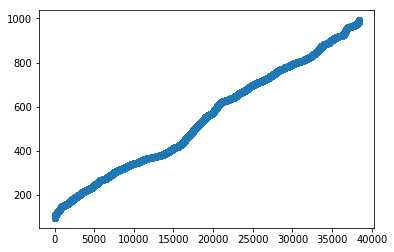

In [277]:
plt.scatter(index_vals,y_vals)

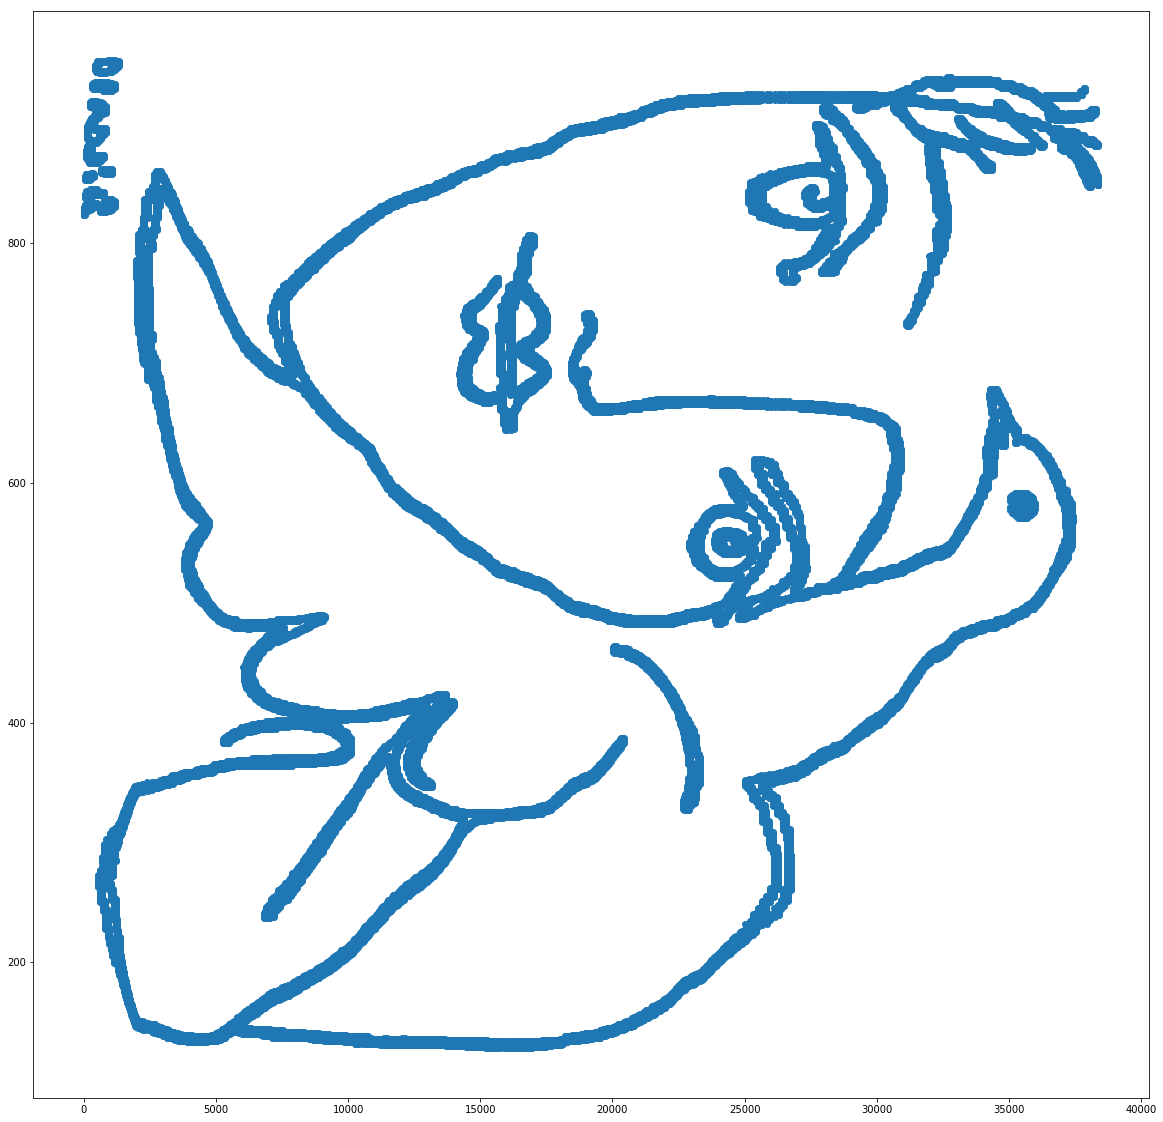

In [287]:
plt.figure(figsize = (20,20))
plt.scatter(index_vals,x_vals)
plt.show()

Decomposing each image into a vector of xs and ys allows us to create two arrays, each of each has no duplicate x/y pairs. This obviates the problem we had before: of how to interplolate an image with multiple y values for every x value. The image above, while it looks very similar to the x/y plot above, in fact has a unique y value for every index value. 

We can now begin interpolating. What we will do is create a series of interpolating functions for the index/y pairs, and another set of interpolating functions for the index/x pairs. We will then plot these two sets of interpolating functions against each other. 

**Interpolation**

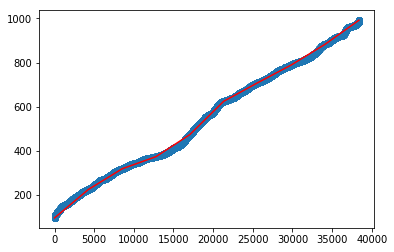

In [308]:
f = interp1d(index_vals, y_vals,fill_value="extrapolate")
xnew = np.linspace(0, len(index_vals), num=10, endpoint=True)
plt.scatter(index_vals, y_vals)
plt.plot(xnew, f(xnew), '-',color='r')

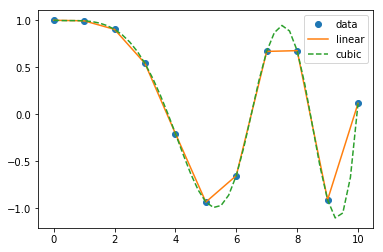

In [362]:
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

xnew = np.linspace(0, 10, num=41, endpoint=True)
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')
plt.show()

Ok, let's break up all the values into discrete segments that we can then interpolate. 

In [454]:
index_arrays = []
index_array = [0]
ind = 0

sub_arrays = []
sub_array = [x_vals[0]]
for i in x_vals[1:len(x_vals)]:
    ind += 1
    if np.abs(i - sub_array[-1])<3:
        sub_array.append(i)
        index_array.append(ind)
    
    else: 
        if len(sub_array)>2: #This is somewhat arbitrary: we just ignore sub-arrays that are smaller than 3 
            #...this reduces the complexity somewhat
            sub_arrays.append(sub_array)
            index_arrays.append(index_array)

            sub_array = []
            sub_array.append(i)

            index_array = []
            index_array.append(ind)
        else: #I.e., if the array is shorter than 2, then don't bother adding it
            sub_array = []
            sub_array.append(i)

            index_array = []
            index_array.append(ind)

Sweet! The above generates an array of continuous little segments, which we can then interpolate. 

Now, let's interpolate each little sub-array using cubic spline interpolation. 

*Going forward, we can write our own interpolation routine. For now, let's just use a built-in function.*

In [455]:
interp_funs = []
for i in range(len(sub_arrays)):
    if len(sub_arrays[i])<4: #i.e., if the array is smaller than 3, just use linear interpolation
        f_i = interp1d(index_arrays[i], sub_arrays[i],fill_value="extrapolate")
        interp_funs.append(f_i)
    
    else:
        f_i = interp1d(index_arrays[i], sub_arrays[i], kind='cubic',fill_value="extrapolate")
        interp_funs.append(f_i)

In [456]:
calc_vals = []

for i in range(len(index_arrays)):
    fun_iter = interp_funs[i]
    
    y_vals = [fun_iter(index_arrays[i])]
    calc_vals.append(y_vals)

In [457]:
calc_val_array = []
for i in calc_vals:
    for j in i[0]:
        calc_val_array.append(j)
        
index_val_array = []
for i in index_arrays:
    for j in i:
        index_val_array.append(j)

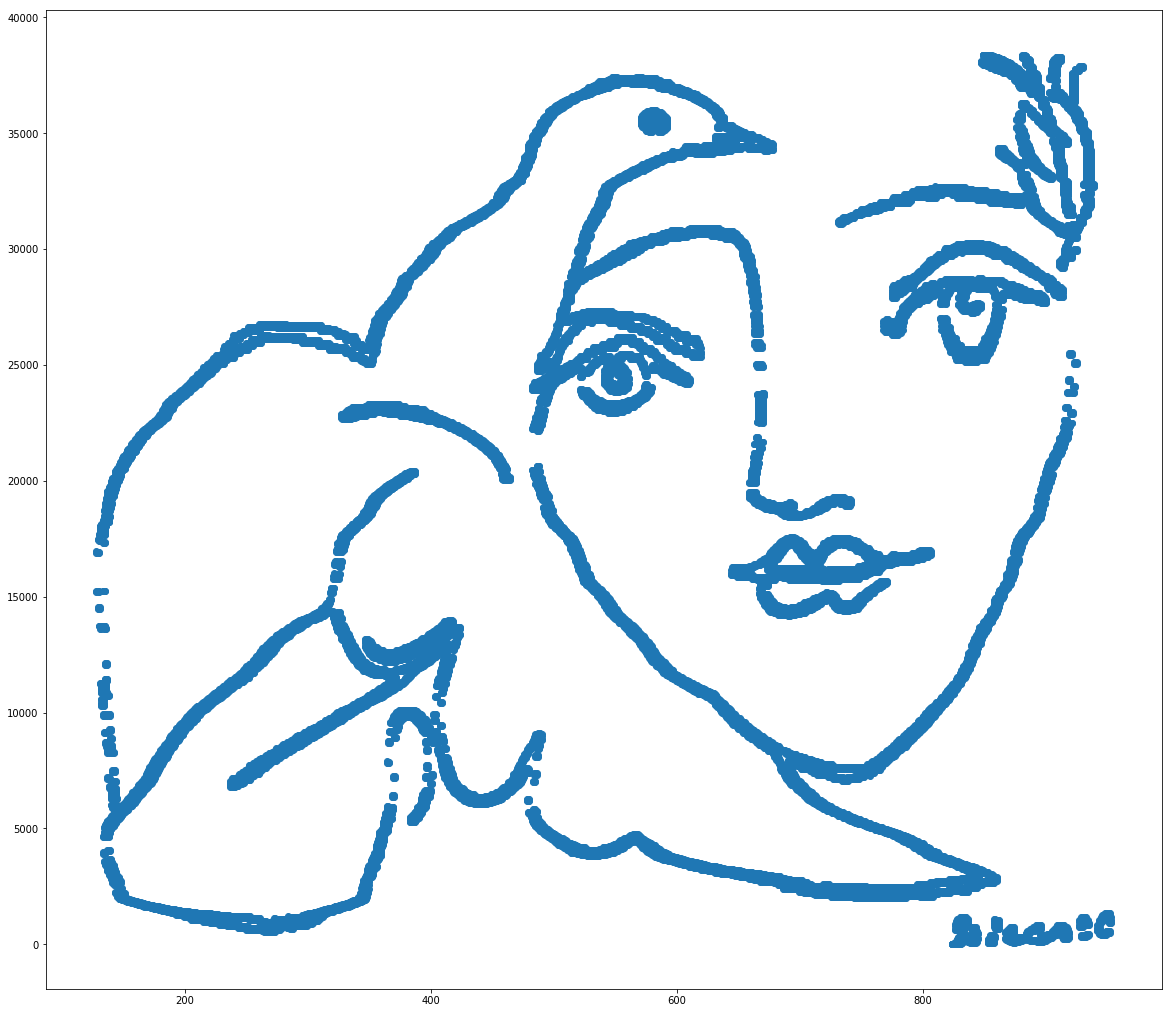

In [460]:
plt.figure(figsize = (20,18))
plt.scatter(calc_val_array,index_val_array)
plt.show()